# Assignment 01- Predict the price of Uber Ride from given pickup pint to agreed drop=off location
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

### Importing Necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.shape

(200000, 9)

### Data Preprocessing

In [6]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
data.drop(columns='Unnamed: 0', inplace=True)

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
data = data[data['fare_amount']> 0]
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:[x[0:10] for x in x.split(' ')])
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:x[0])
data["pickup_datetime"] = pd.DatetimeIndex(data["pickup_datetime"]).year

 Here's an explanation of above code:

1. `data = data[data['fare_amount'] > 0]`:
   - This line filters the DataFrame `data` to keep only the rows where the "fare_amount" column has values greater than 0. It removes any rows with non-positive fares, likely to exclude invalid or missing data.

2. `data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: [x[0:10] for x in x.split(' ')])`:
   - This line processes the "pickup_datetime" column.
   - It splits each datetime string in the "pickup_datetime" column by space (' ') to separate the date and time parts.
   - For each datetime string, it applies a lambda function that takes the first 10 characters (i.e., the date part) using slicing (`x[0:10]`).
   - The result of this operation is a DataFrame where the "pickup_datetime" column now contains only the date part of the original datetime strings.

3. `data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: x[0])`:
   - This line further processes the "pickup_datetime" column.
   - It applies a lambda function that extracts the first character (i.e., the first digit of the date) from each date string.
   - This operation reduces the "pickup_datetime" column to only the first digit of the date, potentially representing the year.

4. `data["pickup_datetime"] = pd.DatetimeIndex(data["pickup_datetime"]).year`:
   - This line converts the modified "pickup_datetime" column into a Pandas `DatetimeIndex` and extracts the year component from the datetime values.
   - It effectively converts the first digit of the date (presumably the year) into a separate column, and the "pickup_datetime" column now represents the year of each pickup.

In summary, the code cleans and preprocesses the "pickup_datetime" column to isolate the year of each pickup and stores it as a new column in the DataFrame. This can be useful when you want to perform analyses or aggregations based on the year of the taxi rides.

In [12]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

X = data.drop(['fare_amount'], axis=1)
y = data['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

### Correlation

In [13]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010468,-0.008489,0.009208,-0.011250,0.010422
pickup_longitude,0.010468,1.000000,-0.816434,0.833132,-0.846449,-0.000488
pickup_latitude,-0.008489,-0.816434,1.000000,-0.774880,0.702450,-0.001500
dropoff_longitude,0.009208,0.833132,-0.774880,1.000000,-0.916971,-0.000104
dropoff_latitude,-0.011250,-0.846449,0.702450,-0.916971,1.000000,-0.000514
passenger_count,0.010422,-0.000488,-0.001500,-0.000104,-0.000514,1.000000


### Outlier Detection

<Axes: >

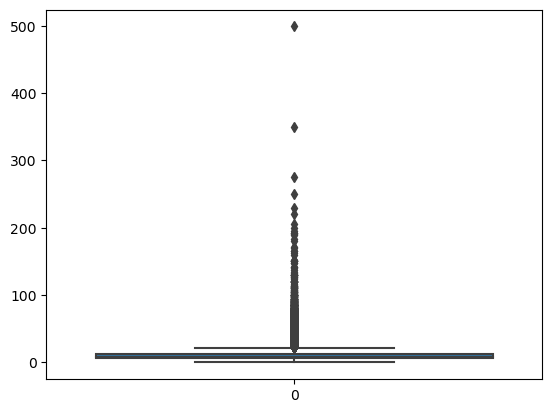

In [14]:
sns.boxplot(data['fare_amount'])

In [15]:
Q1 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
Q3 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
print(Q1,Q3)

6.0 6.0


### Outlier Treatment

In [16]:
data.drop(data[data['fare_amount'].values>=6.0].index, inplace=True)

In [ ]:
sns.boxplot(data['fare_amount']) ## See again 

### Linear Regression

In [18]:
linear = LinearRegression()

In [19]:
linear.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred_linear = linear.predict(x_test)

In [21]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear regression Model")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear regression Model
Linear Regression RMSE: 9.82
Linear Regression R-squared (R2): 0.00


### Random Forest

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(x_test)

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nRandom Forest Regression Model:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Model:
Random Forest Regression RMSE: 4.93
Random Forest Regression R-squared (R2): 0.75


# Assignment 02- Classification of email using binary classification
Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

### Importing Necassary libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv("emails.csv")
df


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [29]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


### Checking For Null Values

In [30]:
#For null column
null_counts = df.isnull().sum()
#Filter the columns with more than one null value
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [31]:
# Removing Email no. column since it is unncessary

x = df.iloc[:,1:3001]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [32]:
# Output Class

y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [33]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 ,random_state=12)

In [34]:
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4075,2,1,3,0,1,2,13,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4835,10,7,3,8,3,5,99,0,0,14,...,0,0,0,0,1,0,0,0,6,0
4439,6,5,4,2,0,9,57,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3910,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
2398,0,1,1,0,4,0,14,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18,11,16,7,5,3,126,1,14,29,...,0,0,0,0,0,0,0,0,0,0
2513,0,4,1,2,0,0,27,0,1,6,...,0,0,0,0,0,0,0,0,0,0
1662,2,4,2,3,1,1,104,0,0,18,...,0,0,0,0,1,0,0,0,3,0
3810,7,2,1,2,1,1,26,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Feature Scaling  

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### K-Nearest Neighbour

In [37]:
#Fitting K-NN classifier to the training set  

from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [38]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

#### Confusion Matrix

In [39]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

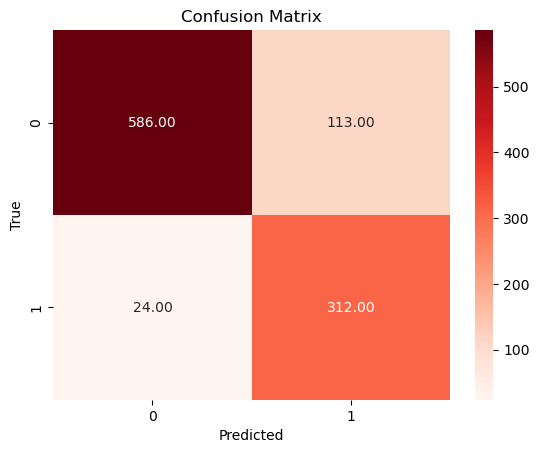

In [40]:
#Confusion matrix graph using seaborn

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy Score

In [41]:
accuracy_score(y_test, y_pred_knn)

0.8676328502415459

### Support Vector Machine

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#### Prediction

In [43]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

#### Confusion Matrix

In [44]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]], dtype=int64)

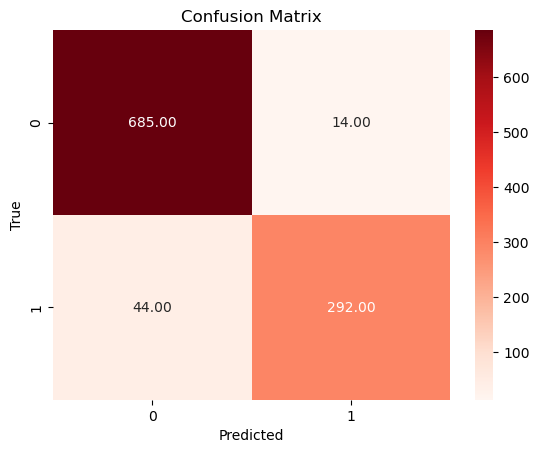

In [45]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy Score

In [46]:
#accuracy score

accuracy_score(y_test, y_pred_svc)

0.9439613526570049

# Assignment 04- Gradient Descend Algorithm
Implement Gradient Descent Algorithm to find the local minima of a function.
For example, find the local minima of the function y=(x+3)² starting from the point x=2.

1. Introduction
Gradient descent (GD) is an iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

However, its use is not limited to ML/DL only, it’s widely used also in areas like:

control engineering (robotics, chemical, etc.)
computer games
mechanical engineering
That’s why today, we will do a deep dive into the math, implementation and behaviour of first-order gradient descent algorithm. We will navigate the custom (cost) function directly to find its minimum. That means there will be no underlying data like in typical ML tutorials — we will be more flexible regarding a function’s shape.

This method was proposed long before the era of modern computers by Augustin-Louis Cauchy in 1847. Since that time, there was an significant development in computer science and numerical methods. That led to numerous improved versions of Gradient Descent. However, in this article we’re going to use a basic/vanilla version implemented in Python.

2. Function requirements
Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:

differentiable
convex
First, what does it mean it has to be differentiable? If a function is differentiable it has a derivative for each point in its domain — not all functions meet these criteria. First, let’s see some examples of functions meeting this criterion:


Examples of differentiable functions; Image by author
Typical non-differentiable functions have a step a cusp or a discontinuity:


Examples of non-differentiable functions; Image by author
Next requirement — function has to be convex. For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.

Mathematically, for two points x₁, x₂ laying on the function’s curve this condition is expressed as:


where λ denotes a point’s location on a section line and its value has to be between 0 (left point) and 1 (right point), e.g. λ=0.5 means a location in the middle.

Below there are two functions with exemplary section lines.


Exemplary convex and non-convex functions; Image by author
Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.


Let’s do a simple example (warning: calculus ahead!).


GIF via giphy
Let’s investigate a simple quadratic function given by:


Its first and second derivative are:


Because the second derivative is always bigger than 0, our function is strictly convex.

It is also possible to use quasi-convex functions with a gradient descent algorithm. However, often they have so-called saddle points (called also minimax points) where the algorithm can get stuck (we will demonstrate it later in the article). An example of a quasi-convex function is:



Let’s stop here for a moment. We see that the first derivative equal zero at x=0 and x=1.5. This places are candidates for function’s extrema (minimum or maximum )— the slope is zero there. But first we have to check the second derivative first.


The value of this expression is zero for x=0 and x=1. These locations are called an inflexion point — a place where the curvature changes sign — meaning it changes from convex to concave or vice-versa. By analysing this equation we conclude that :

for x<0: function is convex
for 0<x<1: function is concave (the 2nd derivative < 0)
for x>1: function is convex again
Now we see that point x=0 has both first and second derivative equal to zero meaning this is a saddle point and point x=1.5 is a global minimum.

Let’s look at the graph of this function. As calculated before a saddle point is at x=0 and minimum at x=1.5.


Semi-convex function with a saddle point; Image by author
For multivariate functions the most appropriate check if a point is a saddle point is to calculate a Hessian matrix which involves a bit more complex calculations and is beyond the scope of this article.

Example of a saddle point in a bivariate function is show below.



Nicoguaro, CC BY 3.0, via Wikimedia Commons
3. Gradient
Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.

A gradient for an n-dimensional function f(x) at a given point p is defined as follows:


The upside-down triangle is a so-called nabla symbol and you read it “del”. To better understand how to calculate it let’s do a hand calculation for an exemplary 2-dimensional function below.



3D plot; Image by author
Let’s assume we are interested in a gradient at point p(10,10):


so consequently:



By looking at these values we conclude that the slope is twice steeper along the y axis.

4. Gradient Descent Algorithm
Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding). This process can be written as:


There’s an important parameter η which scales the gradient and thus controls the step size. In machine learning, it is called learning rate and have a strong influence on performance.

The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point
If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.
In summary, Gradient Descent method’s steps are:

choose a starting point (initialisation)
calculate gradient at this point
make a scaled step in the opposite direction to the gradient (objective: minimise)
repeat points 2 and 3 until one of the criteria is met:
maximum number of iterations reached
step size is smaller than the tolerance (due to scaling or a small gradient).
Below, there’s an exemplary implementation of the Gradient Descent algorithm (with steps tracking):


This function takes 5 parameters:

1. starting point [float] - in our case, we define it manually but in practice, it is often a random initialisation

2. gradient function [object] - function calculating gradient which has to be specified before-hand and passed to the GD function

3. learning rate [float] - scaling factor for step sizes

4. maximum number of iterations [int]

5. tolerance [float] to conditionally stop the algorithm (in this case a default value is 0.01)

5. Example 1 — a quadratic function
Let’s take a simple quadratic function defined as:


Because it is an univariate function a gradient function is:


Let’s write these functions in Python:


For this function, by taking a learning rate of 0.1 and starting point at x=9 we can easily calculate each step by hand. Let’s do it for the first 3 steps:


The python function is called by:


The animation below shows steps taken by the GD algorithm for learning rates of 0.1 and 0.8. As you see, for the smaller learning rate, as the algorithm approaches the minimum the steps are getting gradually smaller. For a bigger learning rate, it is jumping from one side to another before converging.


First 10 steps taken by GD for small and big learning rate; Image by author
Trajectories, number of iterations and the final converged result (within tolerance) for various learning rates are shown below:


Results for various learning rates; Image by author
6. Example 2 — a function with a saddle point
Now let’s see how the algorithm will cope with a semi-convex function we investigated mathematically before.


Below results for two learning rates and two different staring points.


GD trying to escape from a saddle point; Image by author
Below an animation for a learning rate of 0.4 and a starting point x=-0.5.


Animation of GD trying to escape from a saddle point; Image by author
Now, you see that an existence of a saddle point imposes a real challenge for the first-order gradient descent algorithms like GD, and obtaining a global minimum is not guaranteed. Second-order algorithms deal with these situations better (e.g. Newton-Raphson method).

Investigation of saddle points and how to escape from them is a subject of ongoing studies and various solutions were proposed. For example, Chi Jin and M. Jordan proposed a Perturbing Gradient Descent algorithm — details you find in their blog post.

7. Summary
In this article, we checked how a Gradient Decent algorithm works, when can it be used and, what are some common challenges when using it. I hope this will be a good starting point for you for exploring more advanced gradient-based optimisation methods like Momentum or Nesterov (Accelerated) Gradient Descent, RMSprop, ADAM or second-order ones like the Newton-Ralphson algorithm.
Link-https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression).

### Version 1

In [47]:
# Define the function
def function_to_optimize(x):
    return (x + 3)**2

# Define the derivative (gradient) of the function
def gradient(x):
    return 2 * (x + 3)

# Hyperparameters
learning_rate = 0.1
iterations = 1000
x = 2  # Starting point

# Gradient Descent algorithm
for i in range(iterations):
    gradient_value = gradient(x)
    x = x - learning_rate * gradient_value  # Update x

# Print the result
minima = function_to_optimize(x)
print(f"Local minimum at x = {round(x)}, y = {round(minima)}")

Local minimum at x = -3, y = 0


## Version 2

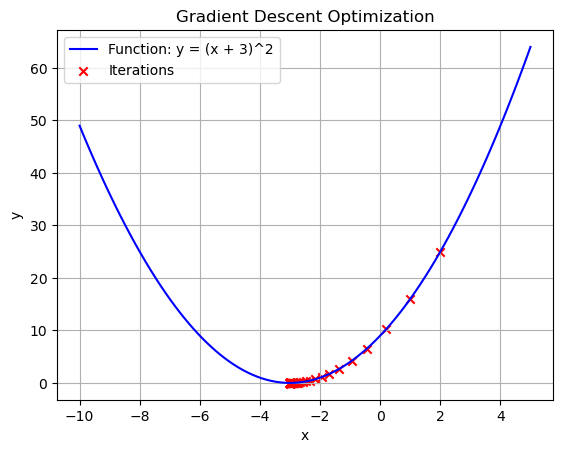

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(x):
    return (x + 3)**2

# Gradient Descent
def gradient_descent(x, learning_rate, max_iterations, tolerance):
    x_values = [x]
    y_values = [func(x)]
    
    for i in range(max_iterations):
        grad = 2 * (x + 3)
        x = x - learning_rate * grad
        x_values.append(x)
        y_values.append(func(x))
        if abs(learning_rate * grad) < tolerance:
            break
    
    return x_values, y_values

# Initial value of x
x_initial = 2

# Hyperparameters
learning_rate = 0.1
max_iterations = 1000
tolerance = 1e-5

x_values, y_values = gradient_descent(x_initial, learning_rate, max_iterations, tolerance)

# Plot the function
x_range = np.linspace(-10, 5, 100)
y_range = func(x_range)

plt.plot(x_range, y_range, label='Function: y = (x + 3)^2', color='blue')

# Plot the iterations
plt.scatter(x_values, y_values, color='red', label='Iterations', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Descent Optimization')
plt.grid(True)
plt.show()

The given code is a Python script that demonstrates gradient descent optimization for minimizing a quadratic function. Gradient descent is an iterative optimization algorithm used to find the minimum of a function, and in this case, it is applied to the function \(y = (x + 3)^2\). 
## Here's an explanation of the code:

1. Import the necessary libraries:
   - `numpy` (as `np`) is used for numerical operations and array handling.
   - `matplotlib.pyplot` (as `plt`) is used for plotting the function and optimization iterations.

2. Define the function \(y = (x + 3)^2\):
   - The function `func(x)` defines a simple quadratic function.

3. Define the `gradient_descent` function:
   - This function performs gradient descent optimization.
   - It takes the initial value of \(x\), learning rate, maximum iterations, and tolerance as input parameters.
   - It initializes lists `x_values` and `y_values` to store the values of \(x\) and \(y\) during the optimization.
   - Inside a loop that runs for a maximum number of iterations, it calculates the gradient of the function at the current \(x\) (which is \(2 \times (x + 3)\)) and updates \(x\) by subtracting the gradient multiplied by the learning rate.
   - It appends the updated \(x\) and the corresponding function value to `x_values` and `y_values`.
   - If the change in \(x\) is smaller than the specified tolerance, the loop breaks, indicating that the optimization has converged.
   - The function returns the lists of \(x\) and \(y\) values during the optimization.

4. Set the initial value of \(x\), hyperparameters, and tolerance.

5. Call the `gradient_descent` function with the specified parameters and store the returned \(x\) and \(y\) values.

6. Create a range of \(x\) values using `numpy.linspace` to represent the entire range of the function.

7. Calculate the corresponding \(y\) values for the entire range using the `func` function.

8. Plot the function:
   - Plot the quadratic function \(y = (x + 3)^2\) in blue.
   - Plot the optimization iterations as red 'x' markers.

9. Add labels, a legend, a title, and gridlines to the plot.

10. Display the plot using `plt.show()`.

The code visually demonstrates how gradient descent optimizes the quadratic function by iteratively updating the \(x\) value to reach the minimum. As the iterations progress, you can see how the algorithm approaches the minimum of the function, and the red 'x' markers indicate the steps taken during the optimization.

# Assignment 05- KNN on Diabetes dataset
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion
matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

### Importing Library

In [49]:
import numpy as np
import pandas as pd
from sklearn import metrics

### Importing Dataset

In [50]:
df_05 = pd.read_csv('diabetes.csv')
df_05

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
df_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df_05.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df_05.shape

(768, 9)

In [56]:
df_05.isnull().any().value_counts()

False    9
Name: count, dtype: int64

In [57]:
df_05.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [58]:
df_x = df_05.drop(columns='Outcome', axis=1)
df_y = df_05['Outcome']

### Data Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(df_x)

### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledX, df_y, test_size=0.2, random_state=42)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

### Confusion Matrix

In [62]:
cs = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",cs)

Confusion matrix: 
 [[78 21]
 [28 27]]


### Accuracy Score

In [63]:
ac = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ",ac)

Accuracy score:  0.6818181818181818


### Error rate

In [64]:
er = 1-ac
print("Error rate: ",er)

Error rate:  0.31818181818181823


### Precision

In [65]:
p = metrics.precision_score(y_test,y_pred)
print("Precision: ", p)

Precision:  0.5625


### Recall

In [66]:
p = metrics.precision_score(y_test,y_pred)
print("Precision: ", p)

Precision:  0.5625


### Classification Report

In [67]:
cr = metrics.classification_report(y_test,y_pred)
print("Classification report: \n\n", cr)

Classification report: 

               precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.56      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



# Assignment 06- Implementation of K-Means Clustering/ Hierarchical Clustering on sales Data
Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

## Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [77]:
df_06 = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')
df_06

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [78]:
df_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [79]:
df_06.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [80]:
df_06.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [81]:
X = df_06.iloc[:, [3,4]].values

*WCSS* is the sum of the squared distance between each point and the centroid in a cluster.

Text(0, 0.5, 'WCSS')

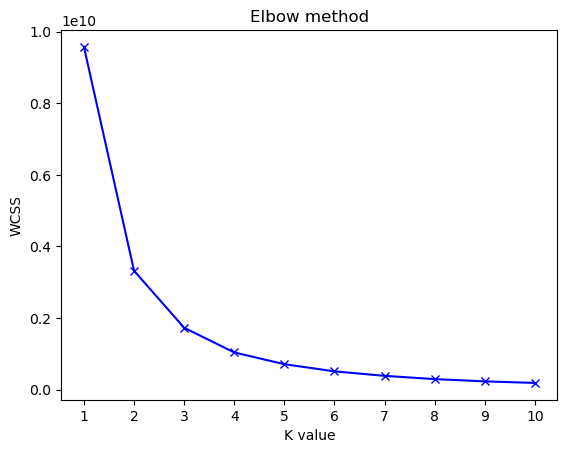

In [82]:
wcss = []   #within cluster sum of square

for i in range(1,11):
    #init argument is the method for initializing the centroid
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    #we calculate wcss value for each k value
    wcss.append(kmeans.inertia_)
    
ks = [1,2,3,4,5,6,7,8,9,10]
plt.plot(ks, wcss, 'bx-')
plt.title("Elbow method")
plt.xticks(ks)
plt.xlabel("K value")
plt.ylabel("WCSS")

In [83]:
# mean is far from std this indicates high variance 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(X)

Text(0, 0.5, 'WCSS')

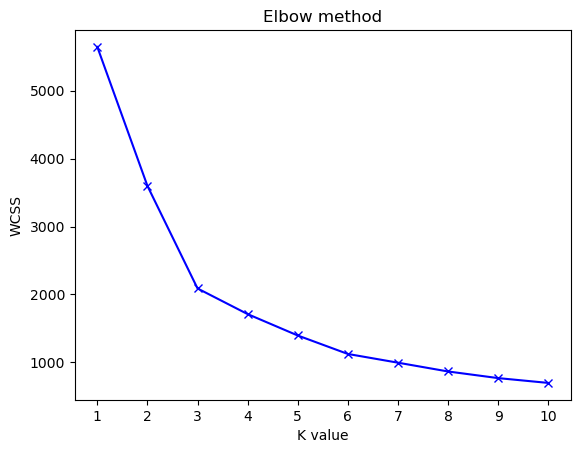

In [84]:
wcss =[]

for i in range(1,11):
    clustering = KMeans(n_clusters=i, init="k-means++", random_state=42)
    clustering.fit(scaled)
    wcss.append(clustering.inertia_)
    
ks = [1,2,3,4,5,6,7,8,9,10]
plt.plot(ks, wcss, 'bx-')
plt.title("Elbow method")
plt.xticks(ks)
plt.xlabel("K value")
plt.ylabel("WCSS")

## Conclusion
For K means Clustering the optimal number of clusters are 3